In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Read in Salary data

In [53]:
df1 = pd.read_csv("C:/Users/arist/Documents/CS6830/baseballdatabank-2022.2/baseballdatabank-2022.2/contrib/Salaries.csv")
df1

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
...,...,...,...,...,...
26423,2016,WAS,NL,strasst01,10400000
26424,2016,WAS,NL,taylomi02,524000
26425,2016,WAS,NL,treinbl01,524900
26426,2016,WAS,NL,werthja01,21733615


## Read in Batting data

In [54]:
df2 = pd.read_csv("C:/Users/arist/Documents/CS6830/baseballdatabank-2022.2/baseballdatabank-2022.2/core/Batting.csv")
df2

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110490,zimmejo02,2021,1,MIL,NL,2,1,0,0,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
110491,zimmeky01,2021,1,KCA,AL,52,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
110492,zimmery01,2021,1,WAS,NL,110,255,27,62,16,...,46.0,0.0,0.0,16,77.0,0.0,0.0,0.0,2.0,9.0
110493,zuberty01,2021,1,KCA,AL,31,1,0,0,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0


## Merge data on playerID

In [55]:
df3 = pd.merge(df1, df2, on="playerID")
df3

,yearID_x,teamID_x,lgID_x,playerID,salary,yearID_y,stint,teamID_y,lgID_y,G,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,1985,ATL,NL,barkele01,870000,1976,1,TEX,AL,2,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1985,ATL,NL,barkele01,870000,1977,1,TEX,AL,15,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,1985,ATL,NL,barkele01,870000,1978,1,TEX,AL,29,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,1985,ATL,NL,barkele01,870000,1979,1,CLE,AL,29,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,1985,ATL,NL,barkele01,870000,1980,1,CLE,AL,36,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322202,2016,WAS,NL,rossjo01,514400,2016,1,WAS,NL,23,...,1.0,0.0,0.0,3,15.0,0.0,0.0,0.0,0.0,1.0
322203,2016,WAS,NL,rossjo01,514400,2017,1,WAS,NL,20,...,1.0,0.0,0.0,1,16.0,0.0,0.0,3.0,0.0,1.0
322204,2016,WAS,NL,rossjo01,514400,2018,1,WAS,NL,3,...,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,1.0
322205,2016,WAS,NL,rossjo01,514400,2019,1,WAS,NL,28,...,0.0,0.0,0.0,1,10.0,0.0,0.0,0.0,0.0,0.0


## limit to recent years (2012-2016 based on salary yearID)

In [56]:
temp = df3[df3.yearID_x > 2011]
temp.columns

Index(['yearID_x', 'teamID_x', 'lgID_x', 'playerID', 'salary', 'yearID_y',
       'stint', 'teamID_y', 'lgID_y', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP'],
      dtype='object')

## Limit dataset to more than 10 games played

In [57]:
temp = temp[temp.G > 10]

## visualize salary distributions

<AxesSubplot:xlabel='salary', ylabel='Count'>

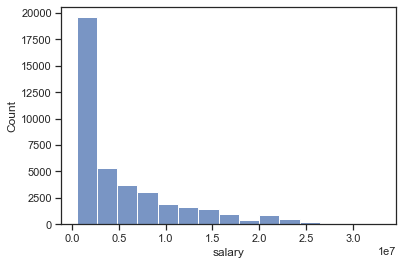

In [58]:
sns.histplot(x='salary', data=temp, bins=15)

## Select features for regressions

In [59]:
feature_cols = ['G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP']

## Setup for regressions

In [60]:
X = temp.loc[:, feature_cols]
# temp[["salary"]].values
# # y = temp.loc[temp.salary]
y = temp.salary
print(y)


52844     1100000
52845     1100000
52846     1100000
52847     1100000
52848     1100000
           ...   
322201     514400
322202     514400
322203     514400
322205     514400
322206     514400
Name: salary, Length: 39872, dtype: int64


## Decision tree regressor

In [61]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)

[Text(0.594303750658248, 0.9857142857142858, 'X[7] <= 59.5\nsquared_error = 35670911407581.78\nsamples = 39872\nvalue = 5245505.371'),
 Text(0.23332210241985027, 0.9571428571428572, 'X[1] <= 1.5\nsquared_error = 29164552059465.242\nsamples = 33456\nvalue = 4500395.323'),
 Text(0.0320774226290994, 0.9285714285714286, 'X[7] <= 3.5\nsquared_error = 13539406553129.04\nsamples = 9828\nvalue = 3184044.301'),
 Text(0.031964959816509896, 0.9, 'X[16] <= 0.5\nsquared_error = 13348152171626.93\nsamples = 9823\nvalue = 3174077.074'),
 Text(0.019029141706658325, 0.8714285714285714, 'X[0] <= 20.5\nsquared_error = 13150320553479.35\nsamples = 9802\nvalue = 3163126.83'),
 Text(0.005801060313454945, 0.8428571428571429, 'X[10] <= 0.5\nsquared_error = 21161049111989.984\nsamples = 2085\nvalue = 3456135.826'),
 Text(0.004488847730623448, 0.8142857142857143, 'X[3] <= 0.5\nsquared_error = 20873823740821.32\nsamples = 2044\nvalue = 3408729.086'),
 Text(0.002736009362529148, 0.7857142857142857, 'X[11] <= 0.5\

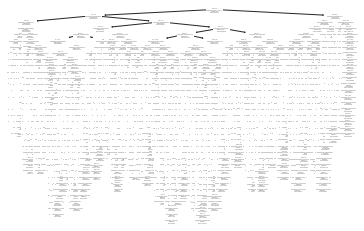

In [62]:
tree.plot_tree(clf)

In [103]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_cols,
                                max_depth = 3,
                                
                                # class_names=['index','Salary'],  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("salary_batting.png") 

'salary_batting.png.pdf'

## Linear regression

Feature: 0, Score: -40018.13244
Feature: 1, Score: -8515.37852
Feature: 2, Score: 26772.35907
Feature: 3, Score: 18752.09693
Feature: 4, Score: -9195.32117
Feature: 5, Score: -129724.49005
Feature: 6, Score: 19900.78201
Feature: 7, Score: 86750.25678
Feature: 8, Score: 87659.55282
Feature: 9, Score: -136223.42111
Feature: 10, Score: 9573.71759
Feature: 11, Score: -16329.83826
Feature: 12, Score: 215861.96159
Feature: 13, Score: -92120.92342
Feature: 14, Score: 231173.47947
Feature: 15, Score: 31805.28073
Feature: 16, Score: 122342.31927


C:\Users\arist\AppData\Local\Temp\ipykernel_57328\1698859247.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


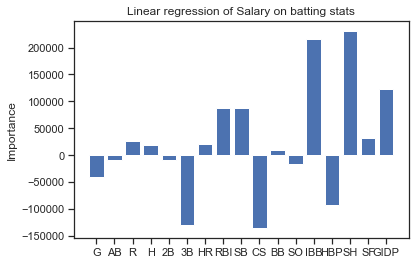

In [102]:
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
fig, ax = plt.subplots()

p1 = ax.bar([x for x in range(len(importance))], importance)
ax.set_ylabel('Importance')
ax.set_title('Linear regression of Salary on batting stats')
ax.set_xticks([x for x in range(len(importance))], labels=feature_cols)
# ax.set(label=feature_cols, ylabel='Importance')
fig.savefig("linearreggression_importance.png")
fig.show()

In [65]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression()
# # fit the model
# model.fit(X, y)
# # get importance
# importance = model.coef_[0]
# # summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

## Random Forest regression

Feature: 0, Score: 0.12958
Feature: 1, Score: 0.11096
Feature: 2, Score: 0.05095
Feature: 3, Score: 0.06219
Feature: 4, Score: 0.04098
Feature: 5, Score: 0.01789
Feature: 6, Score: 0.03133
Feature: 7, Score: 0.18405
Feature: 8, Score: 0.03720
Feature: 9, Score: 0.01634
Feature: 10, Score: 0.05835
Feature: 11, Score: 0.08975
Feature: 12, Score: 0.03212
Feature: 13, Score: 0.02483
Feature: 14, Score: 0.04964
Feature: 15, Score: 0.02092
Feature: 16, Score: 0.04293


C:\Users\arist\AppData\Local\Temp\ipykernel_57328\2203000371.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


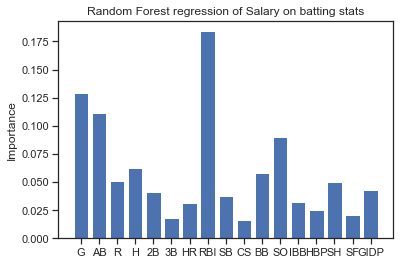

In [101]:

from sklearn.ensemble import RandomForestRegressor

# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
fig, ax = plt.subplots()

p1 = ax.bar([x for x in range(len(importance))], importance)
ax.set_ylabel('Importance')
ax.set_title('Random Forest regression of Salary on batting stats')
ax.set_xticks([x for x in range(len(importance))], labels=feature_cols)
# ax.set(label=feature_cols, ylabel='Importance')
fig.savefig("randomforest_importance.png")
fig.show()

In [67]:
people = pd.read_csv("C:/Users/arist/Documents/CS6830/baseballdatabank-2022.2/baseballdatabank-2022.2/core/BattingPost.csv")
people.columns

Index(['yearID', 'round', 'playerID', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')

In [68]:
from matplotlib import pyplot as plt
import seaborn as sns

In [69]:
temp[temp.isna().any(axis=1)]
temp = temp.dropna()

## Scatterplot distribution of Salary vs. RBI's

<AxesSubplot:xlabel='RBI', ylabel='salary'>

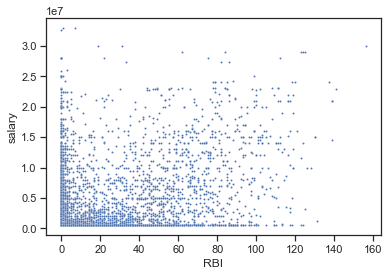

In [70]:
sns.scatterplot(x='RBI', y='salary', data=temp.sample(frac=0.1), s=4)

## Lineplot distribution of Salary vs. RBI's

<AxesSubplot:xlabel='RBI', ylabel='salary'>

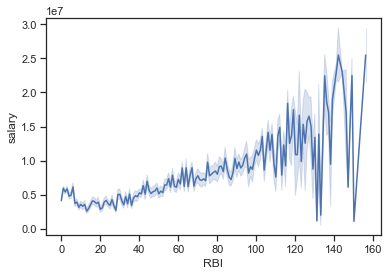

In [71]:
sns.lineplot(x='RBI', y='salary', data=temp)

## Lineplot distribution of Salary vs. Games played

<AxesSubplot:xlabel='G', ylabel='salary'>

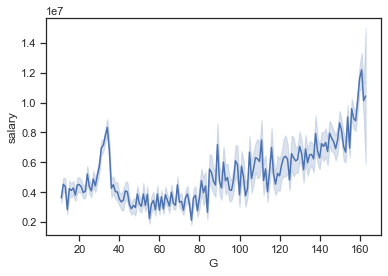

In [72]:
sns.lineplot(x='G', y='salary', data=temp)

## Lineplot distribution of Salary vs. Hits

<AxesSubplot:xlabel='H', ylabel='salary'>

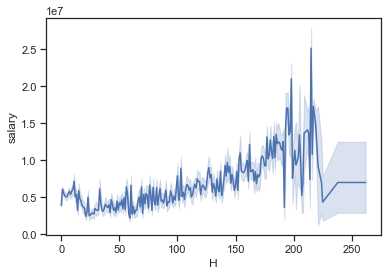

In [73]:
sns.lineplot(x='H', y='salary', data=temp)

## limit data frame to players with only more than 10 RBI's in a season

In [74]:
temp = temp[temp.RBI > 10]

## Histogram of RBI's after limiting

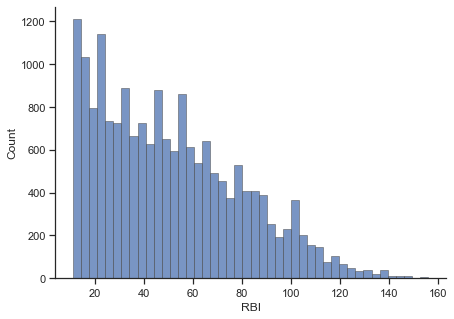

In [75]:
import matplotlib as mpl

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    temp,
    x="RBI",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
# ax.set_xticks([500, 1000, 2000, 5000, 10000])

## Lineplot of salary vs RBI's after limiting

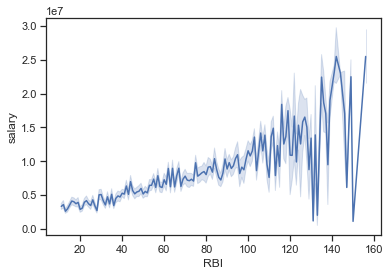

In [98]:
sns.lineplot(x='RBI', y='salary', data=temp)
plt.savefig("lineplot_salary_RBI.pdf")

## Linear Regression of Salary on RBI's, for prediction of salary

In [77]:
feature_name = "RBI"
target_name = "salary"
data, target = temp[[feature_name]], temp[target_name]

In [78]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(data, target)

LinearRegression()

In [79]:
RBI_salary_slope = linear_regression.coef_[0]
RBI_salary_slope

90150.53449951562

In [80]:
intercept = linear_regression.intercept_
intercept

1588988.7772504734

In [81]:
import numpy as np

RBI_range = np.linspace(data.min(), data.max(), num=300)
predicted_salary = (
    RBI_salary_slope * RBI_range + intercept)

In [100]:
# sns.scatterplot(x=data[feature_name], y=target, color="black", alpha=0.5)
sns.scatterplot(x='RBI', y='salary', data=temp.sample(frac=0.1), s=4, alpha=0.5)
plt.plot(RBI_range, predicted_salary)
plt.title("Linear Regression of salary by RBI")
plt.savefig("RBI_linreg.png")
plt.close()

## linear regression of salary on hits

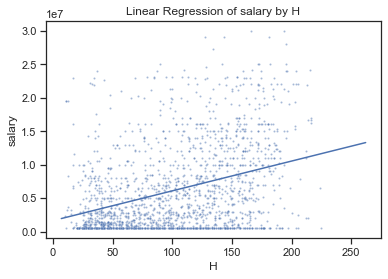

In [83]:
feature_name = "H"
target_name = "salary"
data, target = temp[[feature_name]], temp[target_name]
linear_regression = LinearRegression()
linear_regression.fit(data, target)
slope = linear_regression.coef_[0]
intercept = linear_regression.intercept_
_range = np.linspace(data.min(), data.max(), num=300)
predicted_salary = (slope * _range + intercept)
sns.scatterplot(x='H', y='salary', data=temp.sample(frac=0.1), s=4, alpha=0.5)
plt.plot(_range, predicted_salary)
_ = plt.title("Linear Regression of salary by H")


## linear regression of salary on Homeruns

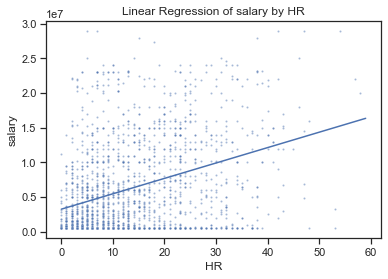

In [99]:
feature_name = "HR"
target_name = "salary"
data, target = temp[[feature_name]], temp[target_name]
linear_regression = LinearRegression()
linear_regression.fit(data, target)
slope = linear_regression.coef_[0]
intercept = linear_regression.intercept_
_range = np.linspace(data.min(), data.max(), num=300)
predicted_salary = (slope * _range + intercept)
sns.scatterplot(x='HR', y='salary', data=temp.sample(frac=0.1), s=4, alpha=0.5)
plt.plot(_range, predicted_salary)
_ = plt.title("Linear Regression of salary by HR")
plt.savefig("HR_linreg.png")

## linear regression of salary on walks

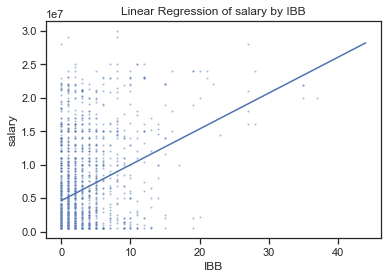

In [85]:
feature_name = "IBB"
target_name = "salary"
data, target = temp[[feature_name]], temp[target_name]
linear_regression = LinearRegression()
linear_regression.fit(data, target)
slope = linear_regression.coef_[0]
intercept = linear_regression.intercept_
_range = np.linspace(data.min(), data.max(), num=300)
predicted_salary = (slope * _range + intercept)
sns.scatterplot(x='IBB', y='salary', data=temp.sample(frac=0.1), s=4, alpha=0.5)
plt.plot(_range, predicted_salary)
_ = plt.title("Linear Regression of salary by IBB")

## Scatterplot matrix of batting stats and salary, for viewing correlations with salary and possible covariance

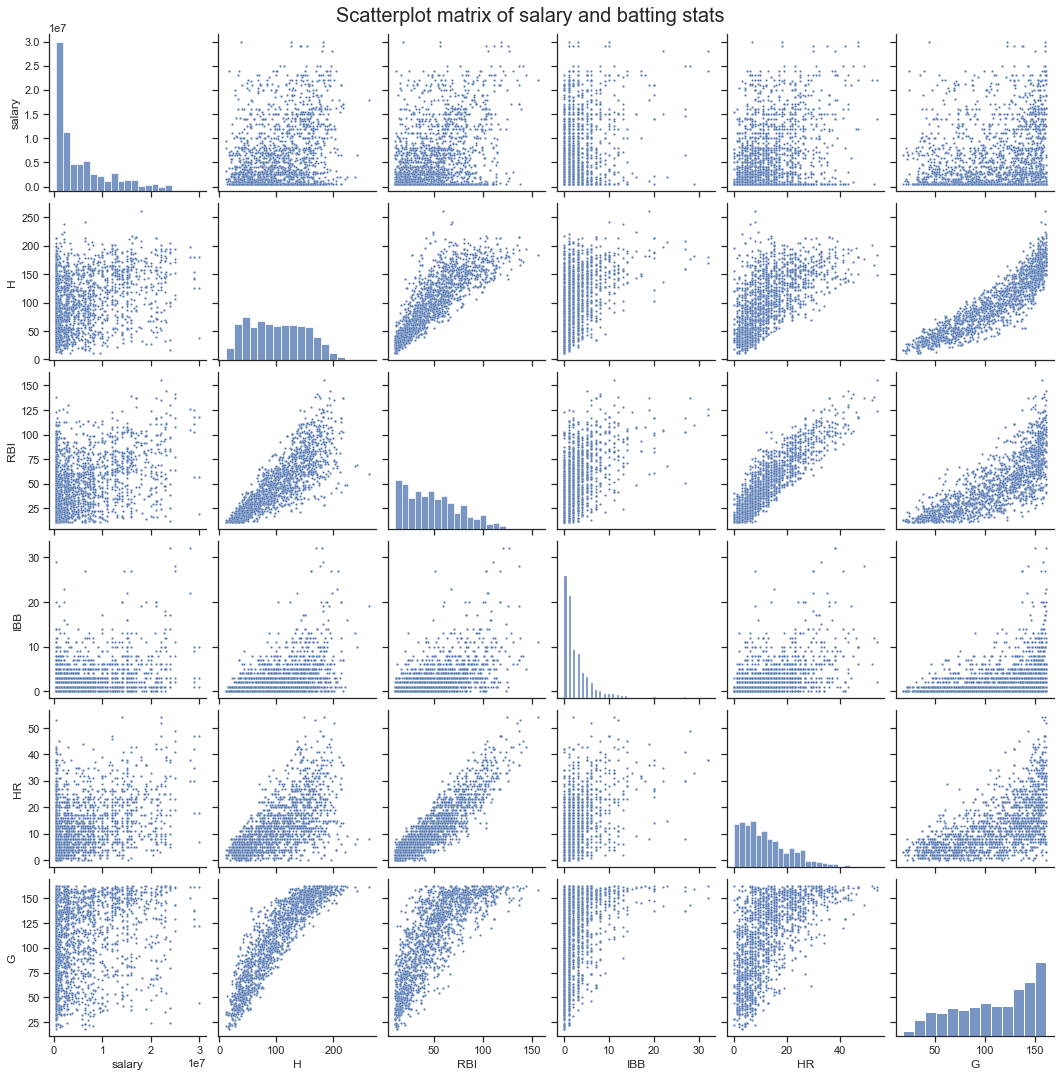

In [87]:
batting_correlations = temp[['salary', 'H', 'RBI', 'IBB', 'HR', 'G']]
g = sns.pairplot(batting_correlations.sample(frac=0.1), plot_kws={'s': 5})
g.fig.suptitle("Scatterplot matrix of salary and batting stats", y=1, fontsize=20)
g.savefig("Scatterplot_matrix.pdf")